![](https://i.postimg.cc/qqSnpxHx/Customer-Churn.png)


**Problem Statement**: To Analyse factors affecting telecom customer churn and model a predictor for customer churn

**Data fields**
* state: string. 2-letter code of the US state of customer residence
* account_length: numerical. Number of months the customer has been with the current telco provider
* area_code: string="area_code_AAA" where AAA = 3 digit area code.
* international_plan: (yes/no). The customer has international plan.
* voice_mail_plan: (yes/no). The customer has voice mail plan.
* number_vmail_messages: numerical. Number of voice-mail messages.
* total_day_minutes: numerical. Total minutes of day calls.
* total_day_calls: numerical. Total number of day calls.
* total_day_charge: numerical. Total charge of day calls.
* total_eve_minutes: numerical. Total minutes of evening calls.
* total_eve_calls: numerical. Total number of evening calls.
* total_eve_charge: numerical. Total charge of evening calls.
* total_night_minutes: numerical. Total minutes of night calls.
* total_night_calls: numerical. Total number of night calls.
* total_night_charge: numerical. Total charge of night calls.
* total_intl_minutes: numerical. Total minutes of international calls.
* total_intl_calls: numerical. Total number of international calls.
* total_intl_charge: numerical. Total charge of international calls
* number_customer_service_calls: numerical. Number of calls to customer service
* churn: (yes/no). Customer churn - target variable.

# Import Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn.objects as so

%matplotlib inline
sns.set_style('dark')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
from xgboost import XGBClassifier


In [2]:
train = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/train.csv')
test = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/test.csv')
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
print('Shape of Train Data: ', train.shape)
print('Shape of Test Data: ',test.shape)

Shape of Train Data:  (4250, 20)
Shape of Test Data:  (750, 20)


**Check Data types of Columns**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
# Convert dtype of categorical columns
cat_cols = ['state','area_code','international_plan','voice_mail_plan','churn']

train[cat_cols] = train[cat_cols].astype('category')
test[cat_cols[:-1]] = test[cat_cols[:-1]].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   category
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

**Check for Missing Values**

In [6]:
# Check for missing values

train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

There are no missing values in the data

**Outlier Check**

In [7]:
#Check for outliers
num_cols = train.select_dtypes(include=['int','float']).columns
i = ['tr'+str(n) for n in range(1,16)]

fig = make_subplots(rows=5, cols=3, 
                    subplot_titles=[f'{col} Box Plot' for col in num_cols],
                   vertical_spacing=0.03)

for index,(col,trace) in enumerate(zip(num_cols, i)):
    trace = go.Box(y=train[col], boxmean=True, name=col)
    fig.add_trace(trace, row=(index//3)+1, col=(index%3)+1)

fig.update_layout(height=2000, width=1000, 
                  title_text="Outlier Check in Numerical Columns", 
                  showlegend=False)
    
fig.show()

Outliers are represented by data points  in box plot beyond the whiskers. We can use the IQR method to replace these data points with the median value of the feature.

In [8]:
# Replace outliers with median

def replace_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)
        
        median = df[col].median()
        
        df[col] = np.where(df[col]<lower_bound, median, df[col])
        df[col] = np.where(df[col]>upper_bound, median, df[col])
        
replace_outliers(train, num_cols)

# Exploratory Data Analysis

**Impact of numerical features on Churn**

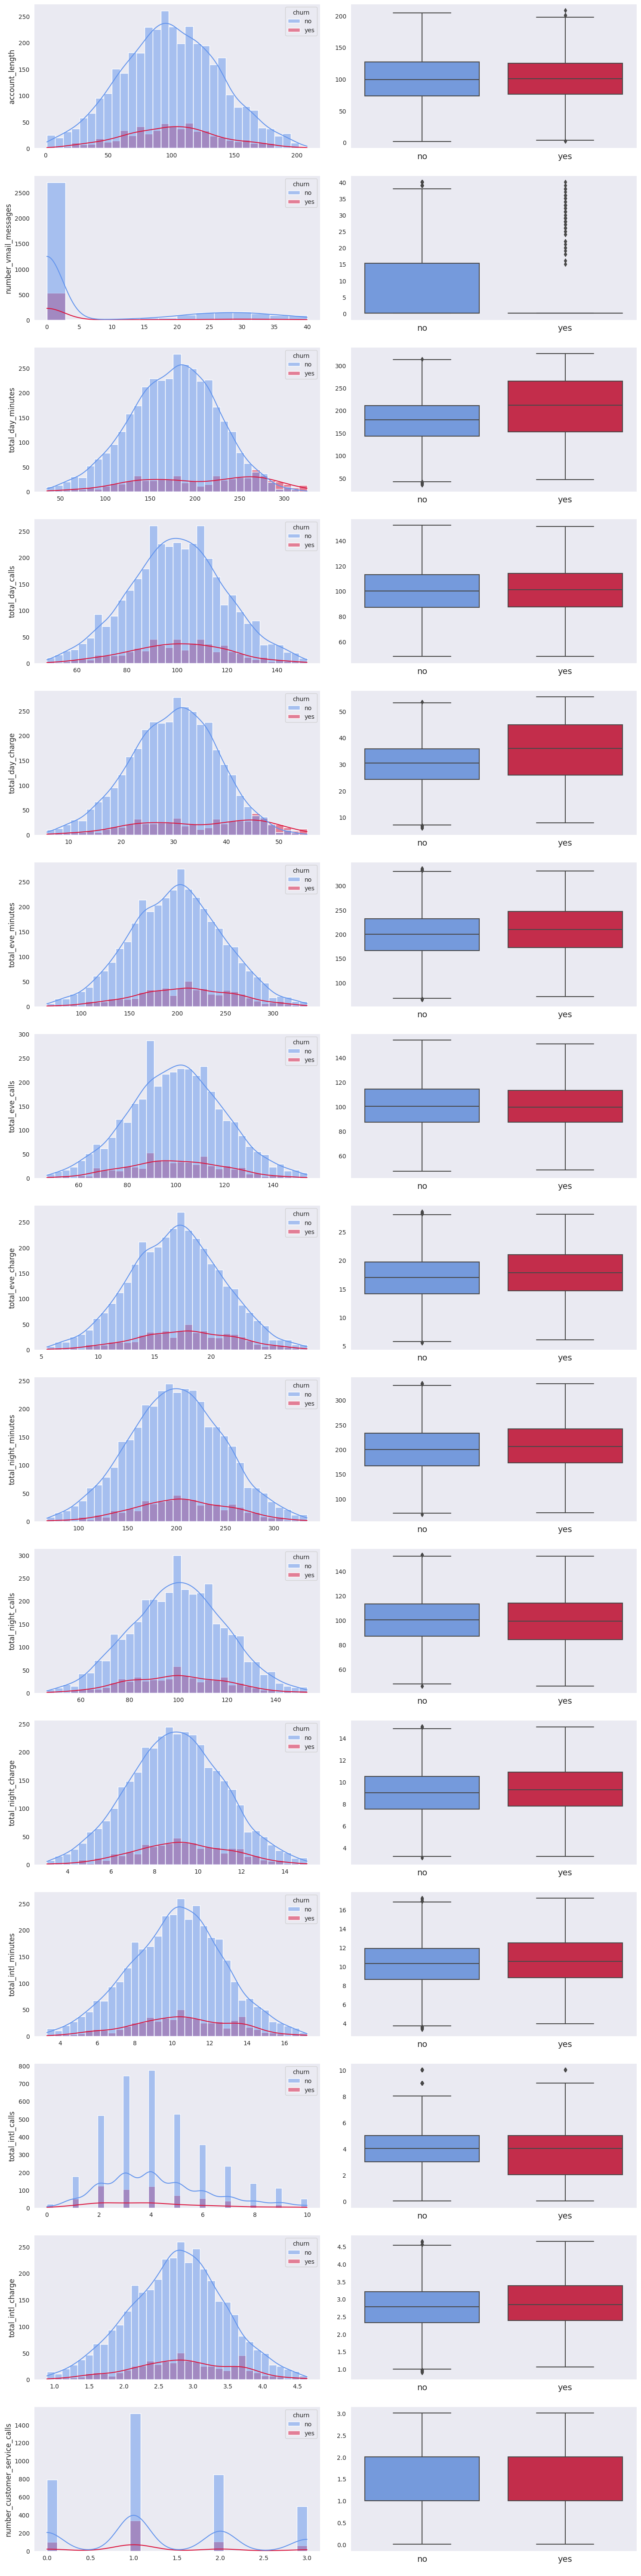

In [9]:
# Visualising impact of Numeric Columns on Churn after replacing outliers

fig, ax = plt.subplots(15,2,figsize=(15,60))
i=0
color_dict = {'no': matplotlib.colors.to_rgba('cornflowerblue', 0.3),
              'yes': matplotlib.colors.to_rgba('crimson', 1)}
for col in num_cols:
    sns.histplot(data=train, x=col, hue='churn', ax=ax[i, 0], legend=True, 
                palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=train, y=col, x='churn', ax=ax[i,1], 
               palette=('cornflowerblue', 'crimson'))
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

**Correlation between Numerical Features**

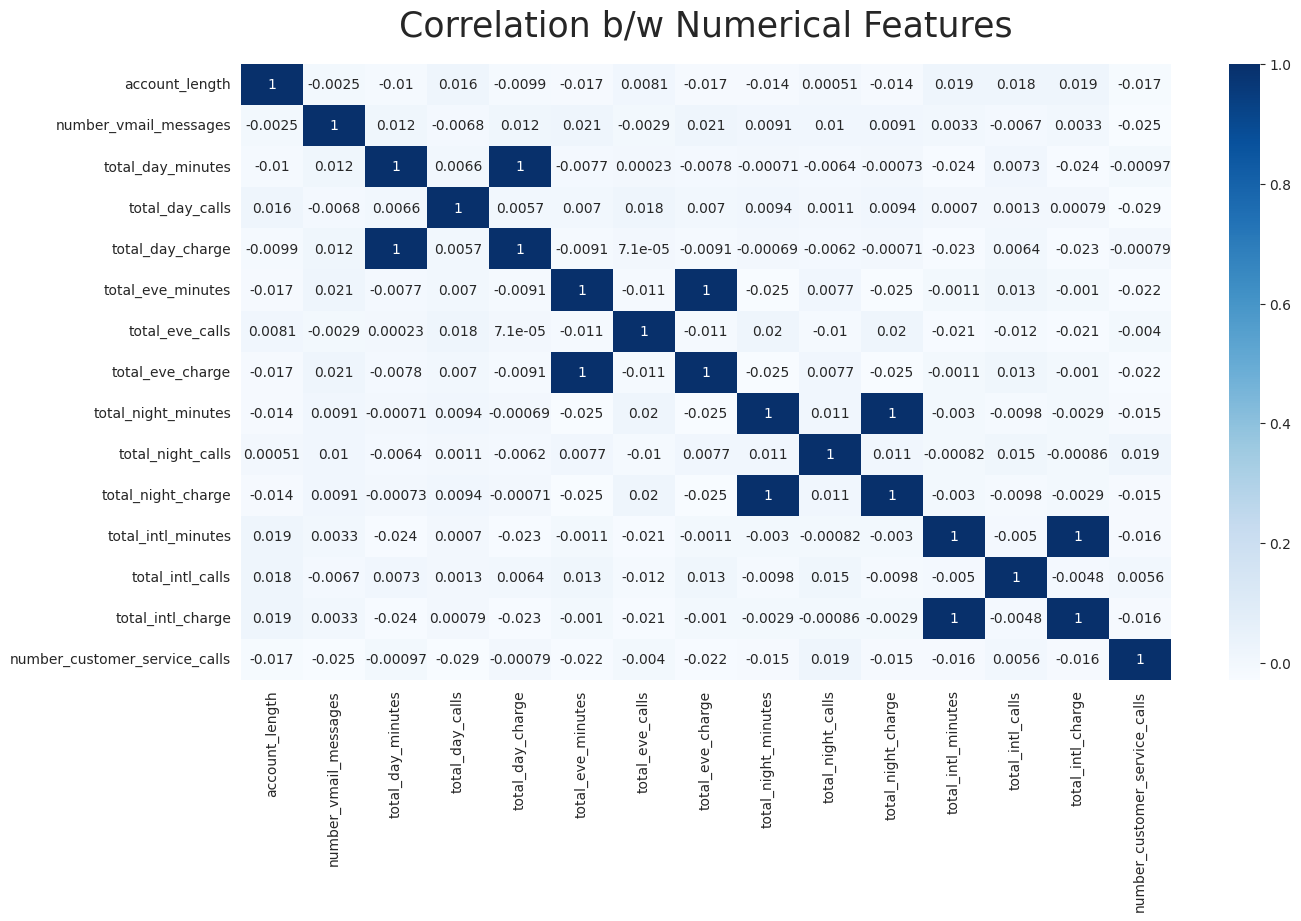

In [10]:
table = train[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

Since charge columns have a correlation of 1 with respective minute columns, we can remove one of them to avoid multicolinearity

In [11]:
# Removing completely correlated columns

for data in [train, test]:
    data.drop(columns=['total_day_charge', 
                       'total_eve_charge', 
                      'total_night_charge',
                      'total_intl_charge'], inplace=True)

train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,no
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,no
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,200.7,88.0,196.9,89.0,6.6,7.0,2.0,no
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0,no
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,200.7,108.0,212.6,118.0,7.5,7.0,3.0,no


**Impact of Categorical Features on Churn**

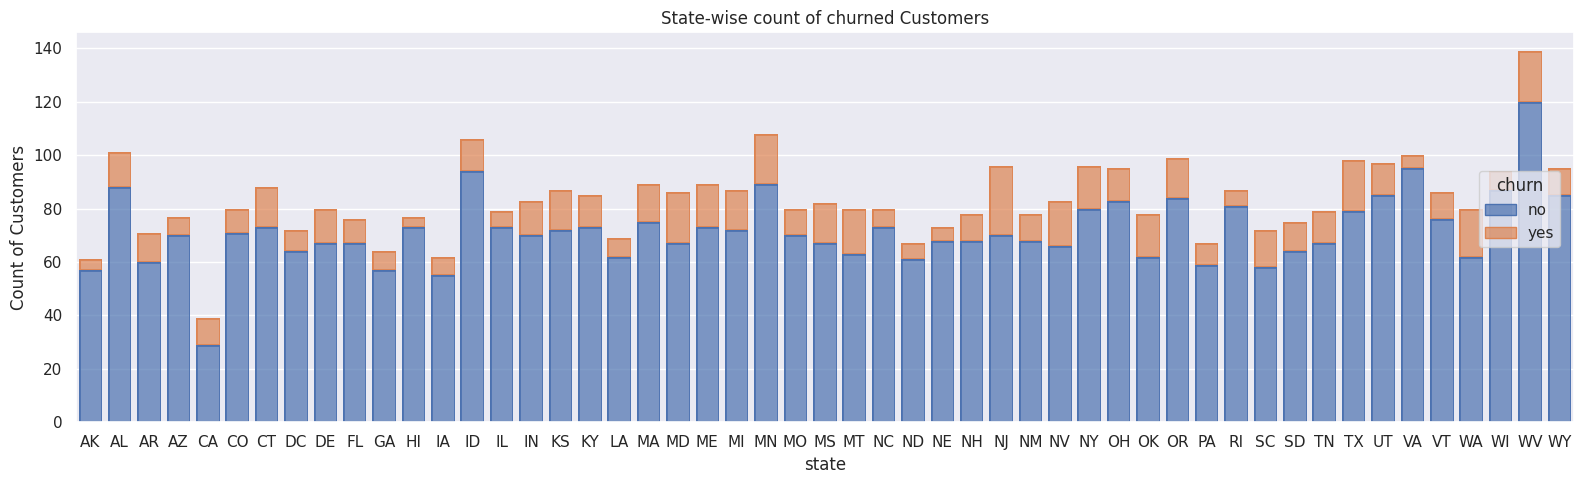

In [12]:
p = (
    so.Plot(train, x='state', color='churn')
    .add(so.Bar(), so.Count(), so.Stack())
    .layout(size=(16,5))
    .label(title="State-wise count of churned Customers",y="Count of Customers")
)

p.show()

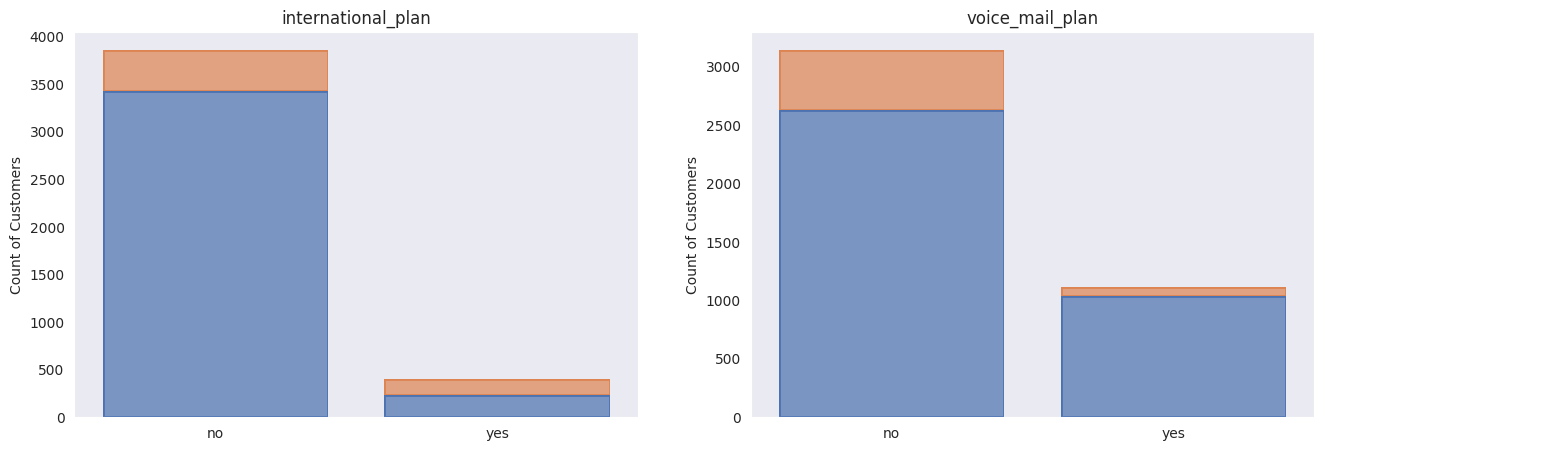

In [13]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

for col,subplot in zip(cat_cols[2:-1], ax.flatten()):
    f = (
        so.Plot(train, x=col, color='churn')
        .add(so.Bar(), so.Count(), so.Stack())
        .label(x=" ", y="Count of Customers", title=col)
        .on(subplot).plot()
    )
    
plt.show()

**Imbalanced Target Variable**

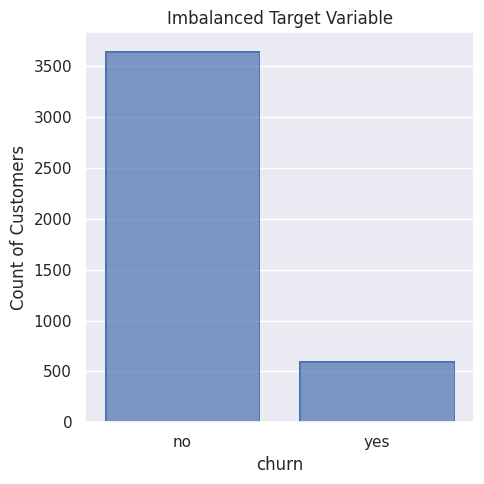

In [14]:
p = (
    so.Plot(train, x='churn')
    .add(so.Bar(),so.Count())
    .layout(size=(5,5))
    .label(title="Imbalanced Target Variable",y="Count of Customers")
)

p.show()

**Feature Engineering**

In [15]:
for data in [train,test]:
    data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
    data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
    data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    data['international_plan'] = data['international_plan'].map({'yes': 1, 'no': 0})
    data.drop(columns= ['state', 'area_code'], inplace= True)
    data.drop(columns=['total_day_calls','total_eve_calls', 'total_night_calls', 
                       'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
    
train['churn'] = train['churn'].map({'yes': 1, 'no': 0}) 
train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn,total_minutes,total_calls
0,107.0,0,1,26.0,13.7,3.0,1.0,0,611.5,329.0
1,137.0,0,0,0.0,12.2,5.0,0.0,0,527.2,328.0
2,84.0,1,0,0.0,6.6,7.0,2.0,0,697.0,248.0
3,75.0,1,0,0.0,10.1,3.0,3.0,0,501.9,356.0
4,121.0,0,1,24.0,7.5,7.0,3.0,0,631.5,314.0


**Correlation of Features with Churn**

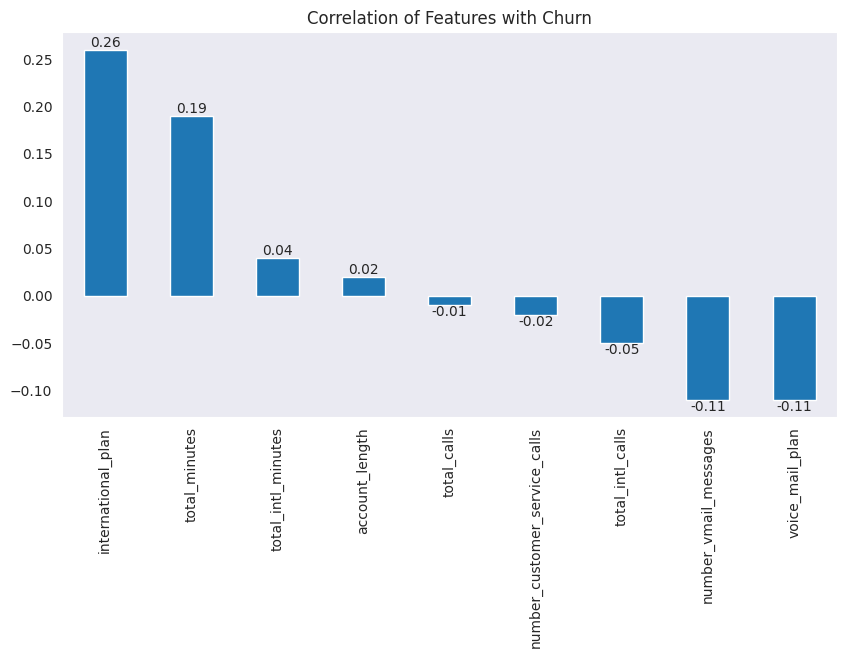

In [16]:
p = round(train.corr()['churn'].sort_values(ascending=False)[1:],2).plot(kind='bar', figsize=(10,5))
p.bar_label(p.containers[0])
plt.title('Correlation of Features with Churn')
plt.show()

# Modelling

**Data Scaling and Splitting**

In [17]:
num_cols = train.select_dtypes(include=[float, int]).columns
cat_cols = ['international_plan','voice_mail_plan']
scaler=StandardScaler()
scaled_cols = scaler.fit_transform(train[num_cols])
train_scaled=pd.DataFrame(scaled_cols, columns=num_cols)
train_scaled[cat_cols] = train[cat_cols]
train_scaled.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_minutes,total_calls,international_plan,voice_mail_plan
0,0.188764,1.550048,1.340576,-0.591544,-0.295258,0.354465,0.864747,0,1
1,0.961465,-0.542948,0.749910,0.380074,-1.361399,-0.633752,0.834923,0,0
2,-0.403641,-0.542948,-1.455244,1.351692,0.770882,1.356749,-1.550973,1,0
3,-0.635452,-0.542948,-0.077023,-0.591544,1.837023,-0.930334,1.669987,1,0
4,0.549358,1.389048,-1.100845,1.351692,1.837023,0.588917,0.417392,0,1


In [18]:
scaled_cols_test = scaler.transform(test[num_cols])
test_scaled=pd.DataFrame(scaled_cols_test, columns=num_cols)
test_scaled[cat_cols] = test[cat_cols]
test_scaled.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_minutes,total_calls,international_plan,voice_mail_plan
0,0.729655,1.469548,-0.116401,-0.591544,-0.295258,1.476319,-0.000140,0,1
1,0.472088,-0.542948,-1.573378,0.865883,-1.361399,0.781168,0.506863,1,0
2,-0.970289,-0.542948,1.104310,0.865883,2.903163,0.581884,-1.640444,0,0
3,-0.171831,-0.542948,-0.864578,-0.591544,1.837023,-0.501286,1.371750,0,0
4,1.914465,-0.542948,2.049376,0.380074,1.837023,0.830403,0.089331,0,0


In [19]:
x= train_scaled
x[cat_cols] = x[cat_cols].astype(int)
y = pd.Series(train['churn'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3400, 9), (850, 9), (3400,), (850,))

**Model Evaluation with Cross Validation**

In [21]:
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),
    
    #Nearest Neighbour
    KNeighborsClassifier(),
    
    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [22]:
# Model Evaluation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, x, y, cv=5, 
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
2,GradientBoostingClassifier,90.400000,81.600000,41.300000,54.800000
3,RandomForestClassifier,90.400000,81.400000,41.800000,55.200000
1,BaggingClassifier,89.500000,71.800000,41.300000,52.400000
7,XGBClassifier,89.400000,70.800000,42.600000,53.100000
0,AdaBoostClassifier,88.000000,66.300000,29.600000,40.900000
4,LogisticRegressionCV,86.500000,70.900000,6.400000,11.600000
6,KNeighborsClassifier,86.500000,56.100000,18.400000,27.600000
5,RidgeClassifierCV,86.300000,63.700000,6.900000,12.200000


Random Forest Classifier from the ensemble models seems to give the best results in terms of model accuracy and f1 score.

In [23]:
# metrics.get_scorer_names()

In [24]:
final_model=RandomForestClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)

final_model.score(x_test, y_test)

0.9070588235294118

**Confusion Matrix for Final Model**

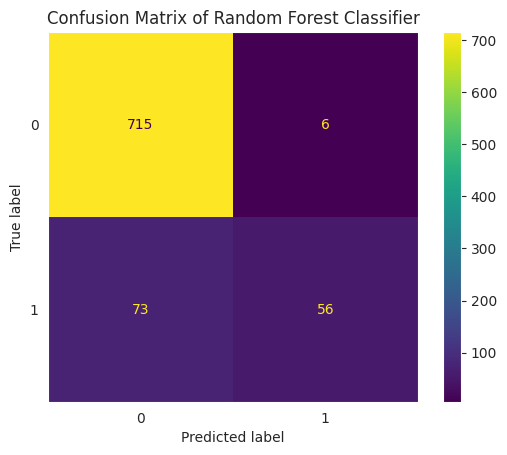

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

**Visualisation of Feature Weights**

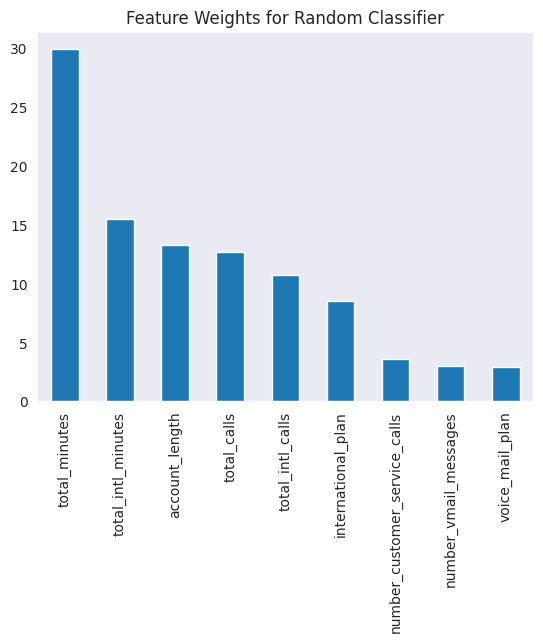

In [26]:
feature_weights = pd.Series((np.round(final_model.feature_importances_,3))*100, 
                            index=x_train.columns.values).sort_values(ascending=False)

feature_weights.plot(kind='bar')
plt.title('Feature Weights for Random Classifier')
plt.show()

**Submission**

In [27]:
predictions = final_model.predict(test_scaled)
submit = pd.DataFrame({'id':test['id'], 'churn':predictions})
submit.churn.replace([0,1],['no','yes'], inplace=True)
submit.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [28]:
submit.shape

(750, 2)

In [29]:
submit.to_csv('churn_submit.csv',index=False)